<center><img src="car.jpg" width=500></center>


Insurance companies invest a lot of time and money into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

(`Source: https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf`) 

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [107]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [108]:
# Load csv into dataframe
car_insurance_df = pd.read_csv('car_insurance.csv')

# Check for unique values
print(car_insurance_df['vehicle_type'].unique())

print("")

# Check for data types
print(car_insurance_df.dtypes)

driving_experience_mapping = {'0-9y':0, '10-19y':1, '20-29y':2, '30y+':3 }
car_insurance_df['driving_experience'] = car_insurance_df['driving_experience'].map         (driving_experience_mapping)

education_mapping = {'none':0, 'high school':1, 'university':2}
car_insurance_df['education'] = car_insurance_df['education'].map(education_mapping)

income_mapping = {'poverty':0, 'working class':1, 'middle class':2, 'upper class':3}
car_insurance_df['income'] = car_insurance_df['income'].map(income_mapping)

vehicle_type_mapping = {'sedan':0, 'sports car':1}
car_insurance_df['vehicle_type'] = car_insurance_df['vehicle_type'].map(vehicle_type_mapping)

['sedan' 'sports car']

id                       int64
age                      int64
gender                   int64
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership      float64
vehicle_year            object
married                float64
children               float64
postal_code              int64
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
duis                     int64
past_accidents           int64
outcome                float64
dtype: object


In [109]:
#Define logistic evaluator function
def logit_eval(predictor):
    """ Calculate logistic model accuracy for a predictor
    
    Parameters
    ----------
    predictor : str
        explanatory variable in car_insurance data
        
    Returns
    ----------
    float
        accuracy of logit model in predicting claims outcome
    """
    
    # Define logistic model for predictor
    claim_v_predictor_logit = logit(f"outcome ~ {predictor}", data=car_insurance_df).fit()
    
    #Generate confusion matrix
    conf_matrix = claim_v_predictor_logit.pred_table()
    
    #Create mosaic plot
    #mosaic(conf_matrix)
    
    #Calculate accuracy
    TN = conf_matrix[0,0]
    TP = conf_matrix[1,1]
    FN = conf_matrix[1,0]
    FP = conf_matrix[0,1]
    accuracy = (TN + TP) / (TN + TP + FN + FP)
    
    return accuracy

test = "vehicle_type"
print(f"Model accuracy for {test} is {100*logit_eval(test):.2f}%")

Optimization terminated successfully.
         Current function value: 0.621700
         Iterations 5
Model accuracy for vehicle_type is 68.67%


Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6


[]

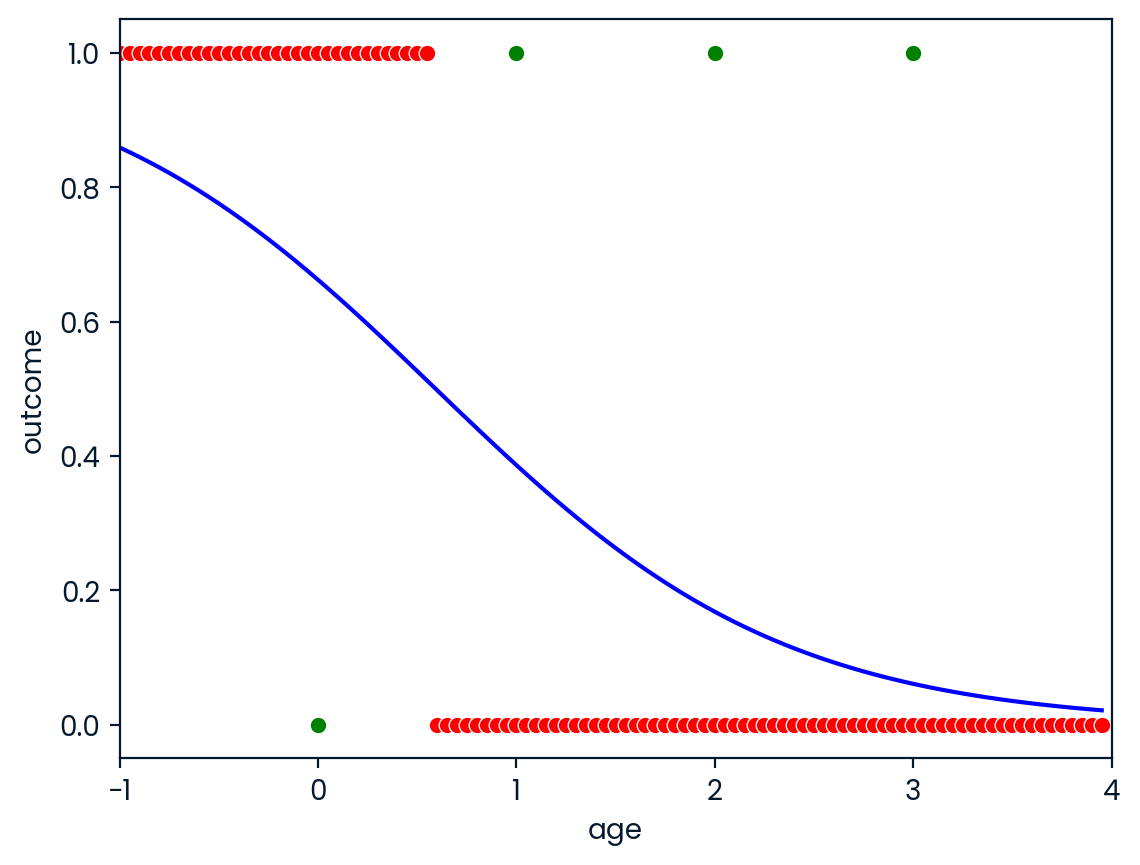

In [110]:
def logit_plot(predictor):
    # Define logistic model for predictor
    claim_v_predictor_logit = logit(f"outcome ~ {predictor}", data=car_insurance_df).fit()

    sns.scatterplot(x=predictor,
            y='outcome',
            data=car_insurance_df,
            color='green')
    
    prediction_data = pd.DataFrame({predictor: np.arange(-1, 4, 0.05)})
    
    prediction_data["outcome"] = claim_v_predictor_logit.predict(prediction_data[predictor])
    
    sns.lineplot(x=predictor,
                y='outcome',
                data=prediction_data,
                color='blue')
    
    prediction_data['outcome'] = np.round(prediction_data['outcome'])

    sns.scatterplot(x=predictor,
                    y='outcome',
                    data=prediction_data,
                    color='red')

    
logit_plot("age")

plt.xlim(-1,4)
plt.plot()

In [111]:
predictor_list = list(car_insurance_df.columns)
predictor_list.remove("outcome")
predictor_list.remove("id")

predictor_df = pd.DataFrame({"Predictor":key, "Accuracy":logit_eval(key)} for key in predictor_list).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print()

print(predictor_df)

best_feature_df = pd.DataFrame(
    {"best_feature":[predictor_df.iloc[0]["Predictor"]],
    "best_accuracy":[predictor_df.iloc[0]["Accuracy"]]}
    )

print(best_feature_df)

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467390
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.603848
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531580
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567469
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  